# plot a ugrid mesh

In [1]:
%matplotlib inline

In [2]:
import matplotlib.tri as tri
import netCDF4

In [3]:
#url = 'http://www.smast.umassd.edu:8080/thredds/dodsC/fvcom/mwra/fvcom'
url = 'http://geoport.whoi.edu/thredds/dodsC/usgs/vault0/models/tides/vdatum_fl_sab/adcirc54.ncml'

In [4]:
ncv = netCDF4.Dataset(url).variables
lon = ncv['lon'][:]
lat = ncv['lat'][:]
nv = ncv['ele'][:]-1
triang = tri.Triangulation(lon,lat,triangles=nv)

In [5]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw=dict(projection=projection))
    ax.coastlines(resolution='10m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

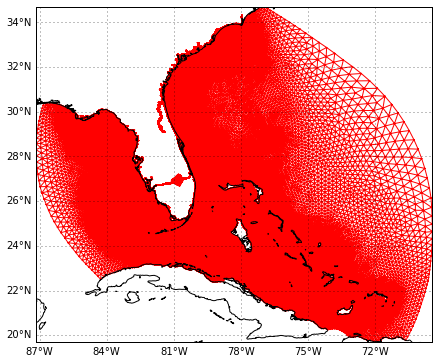

In [10]:
#geodetic = ccrs.Geodetic(globe=ccrs.Globe(datum='WGS84'))
#fig, ax = make_map(projection=geodetic)
fig, ax = make_map()

kw = dict(marker='.', linestyle='-', alpha=0.85, color='darkgray')
kw = dict(linestyle='-',color='red')
ax.triplot(triang, **kw)  # or lon, lat, triangules;
#ax.set_extent([-84, -78, 25, 32])

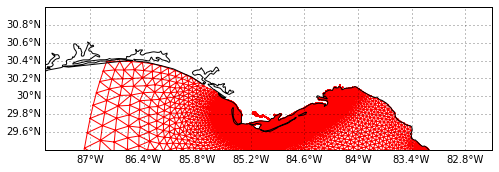

In [12]:
import mplleaflet
#geodetic = ccrs.Geodetic(globe=ccrs.Globe(datum='WGS84'))
#fig, ax = make_map(projection=geodetic)
fig, ax = make_map()

kw = dict(marker='.', linestyle='-', alpha=0.85, color='darkgray')
kw = dict(linestyle='-',color='red')
ax.triplot(triang, **kw)  # or lon, lat, triangules;
ax.set_extent([-87.5, -82.5, 29.4, 31])

In [ ]:
from cartopy.io.img_tiles import MapQuestOpenAerial, MapQuestOSM, OSM
geodetic = ccrs.Geodetic(globe=ccrs.Globe(datum='WGS84'))

fig = plt.figure(figsize=(12,8))
tiler = MapQuestOpenAerial()
ax = plt.axes(projection=tiler.crs)

bbox=[-71, -69.3, 42, 42.8]
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(bbox)
ax.add_image(tiler, 8)

#ax.coastlines()
kw = dict(marker='.', linestyle='-', alpha=0.85, color='darkgray', transform=geodetic)
ax.triplot(triang, **kw)  # or lon, lat, triangules
#ax.set_extent()
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
